# LOADING DATA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


In [3]:
Data_path = '/content/drive/MyDrive/OASIS SALES/Task_5_SalesPredi/archive_sales/Advertising.csv'

## DATA EXPLOARATION

In [4]:
Sales_df = pd.read_csv(Data_path)
Sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
Sales_df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
#Checking data types of each column
Sales_df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

Distribution plot for :  TV


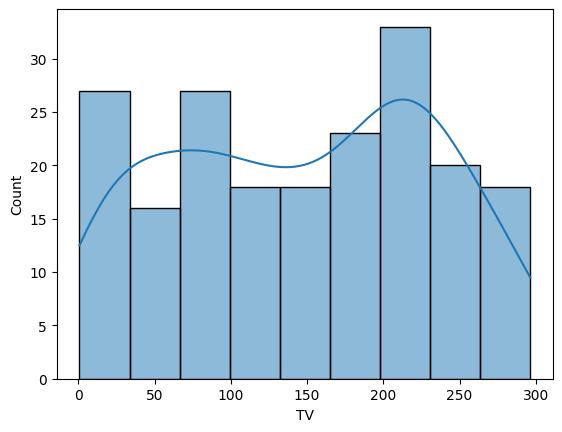

Distribution plot for:  RADIO


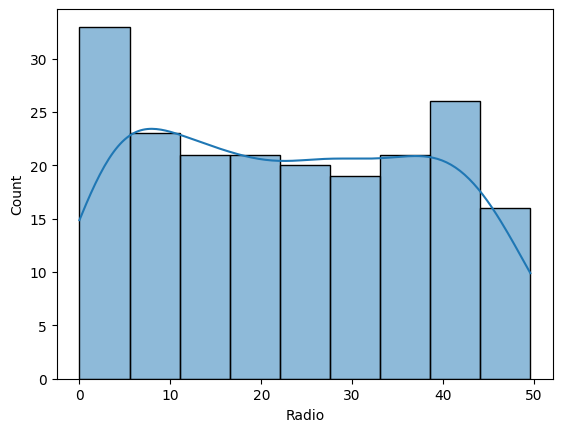

Distribution plot for:  NEWSPAPER


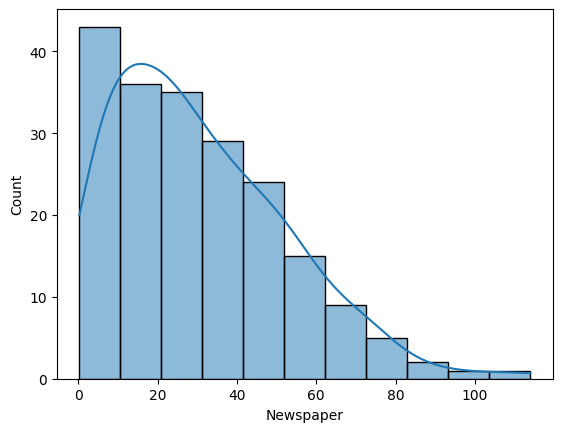

In [8]:
#Histo plots of all the features
num_features = ['TV','Radio','Newspaper']
for feature in num_features:
    if feature == 'TV':
        sns.histplot(Sales_df[feature],kde = True)
        print("Distribution plot for : ", feature.upper())
        plt.show()
    elif feature == 'Radio':
        sns.histplot(Sales_df[feature],kde = True)
        print("Distribution plot for: ",feature.upper())
        plt.show()
    elif feature == 'Newspaper':
        sns.histplot(Sales_df[feature],kde = True)
        print("Distribution plot for: ",feature.upper())
        plt.show()


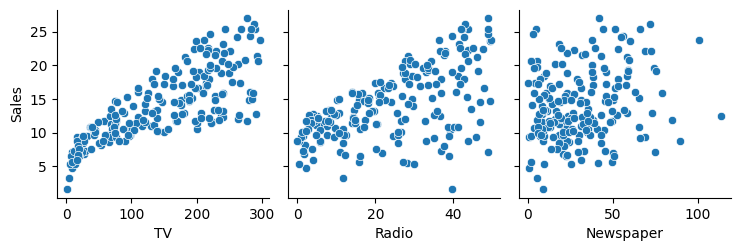

In [9]:
#Scatter plots(pairplots) for all the features againsts the target(Sales)
sns.pairplot(Sales_df, x_vars=["TV","Radio", "Newspaper"], y_vars= ["Sales"],kind = "scatter")
plt.show()

#####From the scatter plots,there is more positive correlation between TV and sales compare to Radio and Newspaper.For Radio and Newspaper the sales tend to decrease as the Radio value increase

## PREPROCESSING

In [11]:

#Checking and Removing columns with missing data
cols_with_missing = [col for col in Sales_df.columns
                     if Sales_df[col].isnull().any()]

if cols_with_missing:
    print(cols_with_missing)
else:
    print("No columns with msiing values,therefore no need for imputation")

No columns with msiing values,therefore no need for imputation


In [12]:
# Dropping unnamed column
Sales_df = Sales_df.drop(columns = 'Unnamed: 0',axis =1)

# MODEL TRAINING AND EVALUATION

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

#Loading Features
features = ['TV','Radio','Newspaper']
X = Sales_df[features]

#Target variable
y = Sales_df.Sales

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.4,random_state = 42)
X_val,X_test,y_val,y_test = train_test_split(X_val,y_val, test_size = 0.5, random_state = 42)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(120, 3)
(120,)
(40, 3)
(40,)
(40, 3)
(40,)


# DECISION TREE REGRESSOR

In [24]:
Model_1 = DecisionTreeRegressor(random_state = 42)
Model_1.fit(X_train,y_train)
#Predictions on validation set
predictions_val = Model_1.predict(X_val)

#Predictions on test set
predictions_test = Model_1.predict(X_test)

In [25]:
# Evaluate model quality using MAE
from sklearn.metrics import mean_absolute_error
Eval_error = mean_absolute_error(y_val,predictions_val)
Test_evalError = mean_absolute_error(y_test,predictions_test)
print(f"Validation mean absolute error is : {Eval_error}")
print(f"Test pred mean absolute error is : {Test_evalError}")

Validation mean absolute error is : 1.0775000000000001
Test pred mean absolute error is : 0.9349999999999998


# XGBOOST

In [26]:
from xgboost import XGBRegressor

XG_model = XGBRegressor(n_estimators=500,learning_rate=0.05,n_jobs=4)
XG_model.fit(X_train, y_train)
#Predictions on validation set
XGpredictions_val = XG_model.predict(X_val)

#Predictions on test set
XGpredictions_test = XG_model.predict(X_test)

In [28]:
# Evaluate model quality using MAE
from sklearn.metrics import mean_absolute_error
XGval_error = mean_absolute_error(y_val,XGpredictions_val)
XGTest_evalError = mean_absolute_error(y_test,XGpredictions_test)
print(f"Mean absolute error for Validation pred  is : {XGval_error}")
print(f"Mean absolute error for Test pred is : {XGTest_evalError}")

Mean absolute error for Validation pred  is : 0.7400739669799804
Mean absolute error for Test pred is : 0.7137335371971132
